X_train shape: (3737, 22)
y_train shape: (3737, 1)
X_test shape: (1601, 22)
y_test shape: (1601, 1)
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best hyperparameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
Training RMSE: 0.0127, MAE: 0.0021, R2: 0.8979
Testing RMSE: 0.0058, MAE: 0.0030, R2: 0.9755


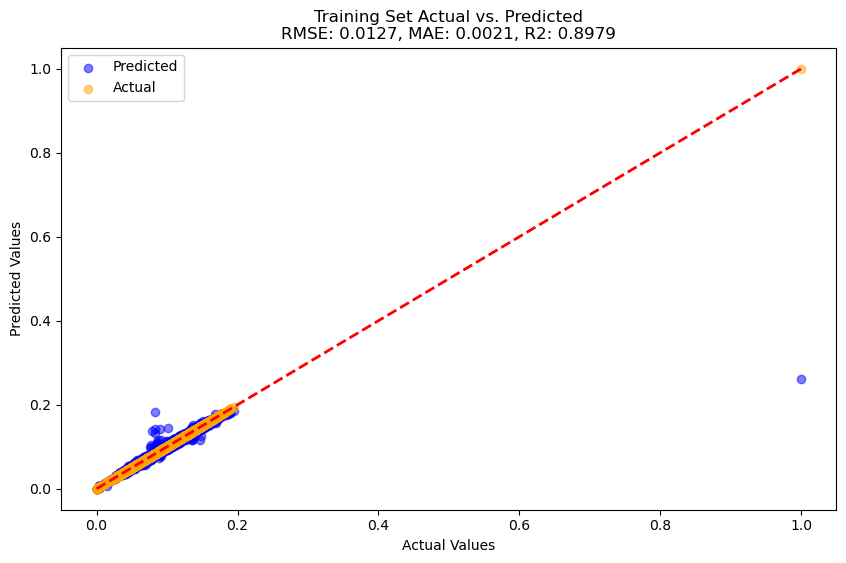

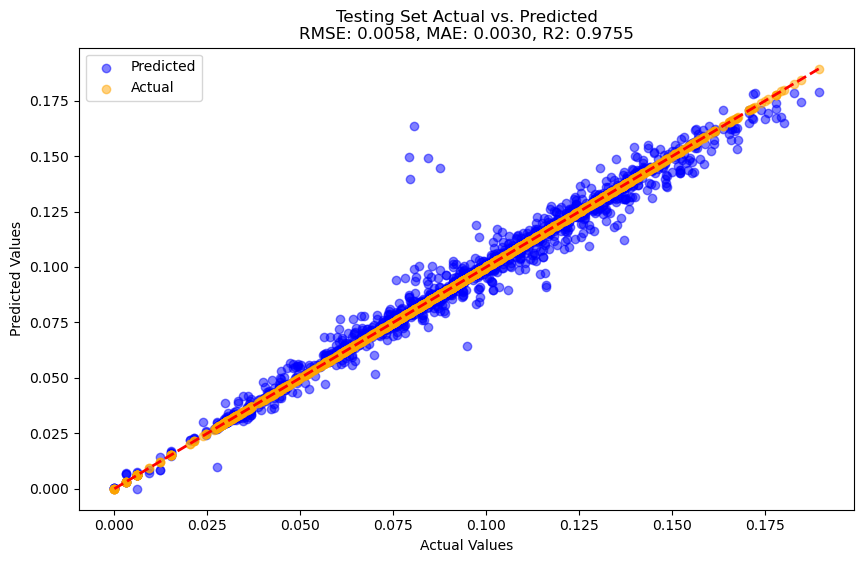

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import sqrt

# Define the file path to the Excel file
file_path = "C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/pressure_splits_70_30.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the Extra Trees model
et_model = ExtraTreesRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(et_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time

# Best model after GridSearch
best_et_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Fit the best model on the training set
best_et_model.fit(X_train, y_train.values.ravel())

# Make predictions on the datasets
y_train_pred = best_et_model.predict(X_train)
y_test_pred = best_et_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (4005, 22)
y_train shape: (4005, 1)
X_test shape: (1333, 22)
y_test shape: (1333, 1)
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best hyperparameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training RMSE: 0.0120, MAE: 0.0021, R2: 0.9092
Testing RMSE: 0.0063, MAE: 0.0030, R2: 0.9709


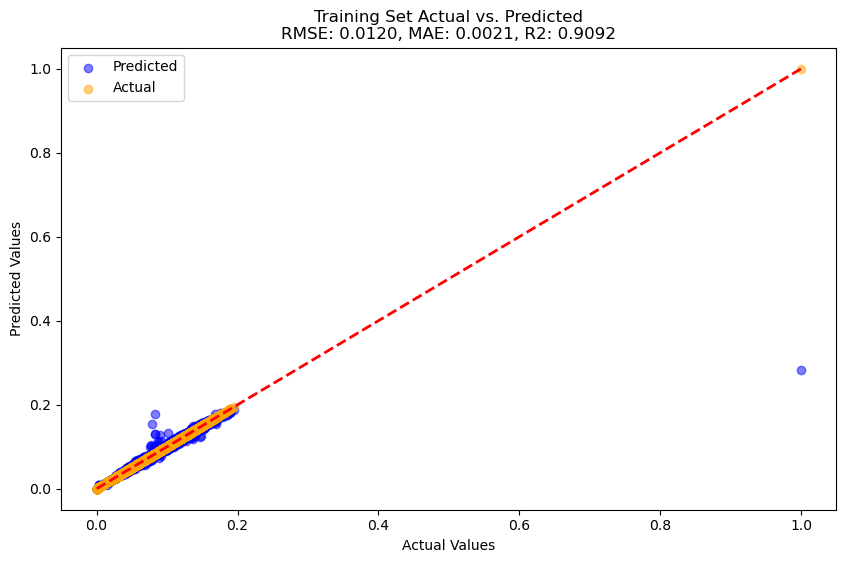

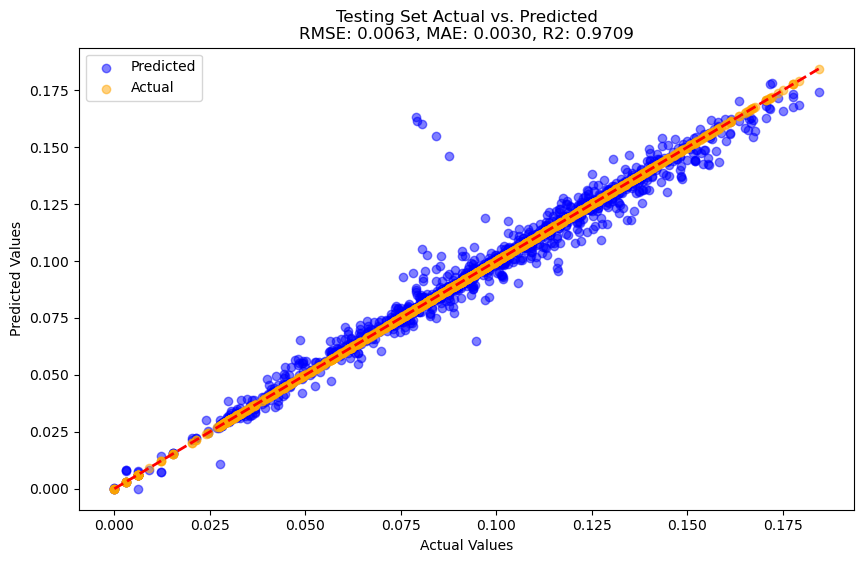

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import sqrt

# Define the file path to the Excel file
file_path = "C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/pressure_splits_75_25.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the Extra Trees model
et_model = ExtraTreesRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(et_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time

# Best model after GridSearch
best_et_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Fit the best model on the training set
best_et_model.fit(X_train, y_train.values.ravel())

# Make predictions on the datasets
y_train_pred = best_et_model.predict(X_train)
y_test_pred = best_et_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from math import sqrt
import joblib

# Read the dataset
predict_dataset = pd.read_excel('C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/Bunter_pressure.xlsx')

# Separate features and labels
X_predict = predict_dataset.iloc[:, :-1].values
y_predict_actual = predict_dataset.iloc[:, -1].values

# Load the previously used scaler
scaler = joblib.load('scaler.pkl')

# Scale the new data
X_predict_scaled = scaler.transform(X_predict)

# Reshape the input to fit SimpleRNN input shape
X_predict_scaled = X_predict_scaled.reshape((X_predict.shape[0], 1, X_predict.shape[1]))

# Load the trained model
best_et_model = joblib.load('best_et_model.pkl')
y_predict_pred = best_et_model.predict(X_predict_scaled)

# Calculate evaluation metrics
new_rmse = sqrt(mean_squared_error(y_predict_actual, y_predict_pred))
new_mae = mean_absolute_error(y_predict_actual, y_predict_pred)
new_r2 = r2_score(y_predict_actual, y_predict_pred)

# Print metrics
print(f"New data RMSE: {new_rmse:.4f}, MAE: {new_mae:.4f}, R2: {new_r2:.4f}")

# Plot actual vs. predicted values
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_predict_actual, y_predict_pred, f'New Data Actual vs. Predicted\nRMSE: {new_rmse:.4f}, MAE: {new_mae:.4f}, R2: {new_r2:.4f}')


FileNotFoundError: [Errno 2] No such file or directory: 'scaler.pkl'

X_train shape: (4271, 22)
y_train shape: (4271, 1)
X_test shape: (1067, 22)
y_test shape: (1067, 1)
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best hyperparameters found:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training RMSE: 0.0079, MAE: 0.0011, R2: 0.9605
Testing RMSE: 0.0099, MAE: 0.0027, R2: 0.9292


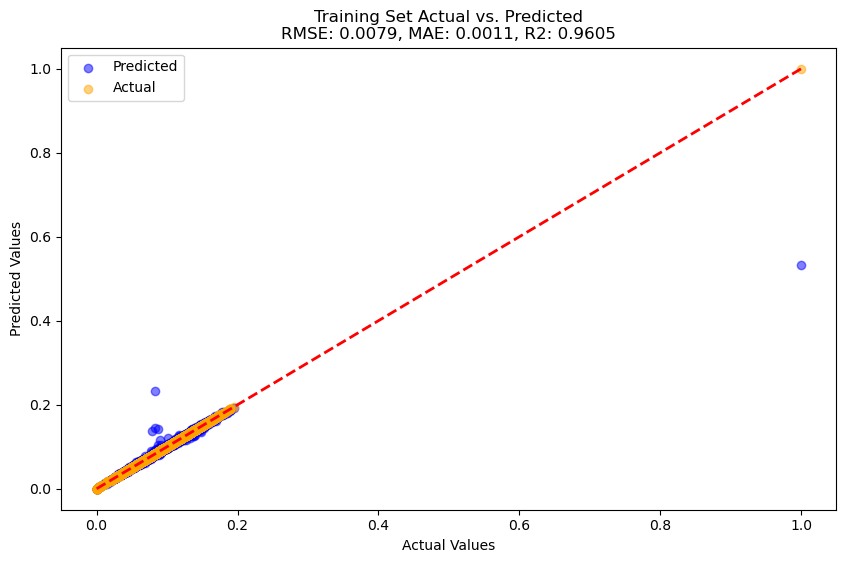

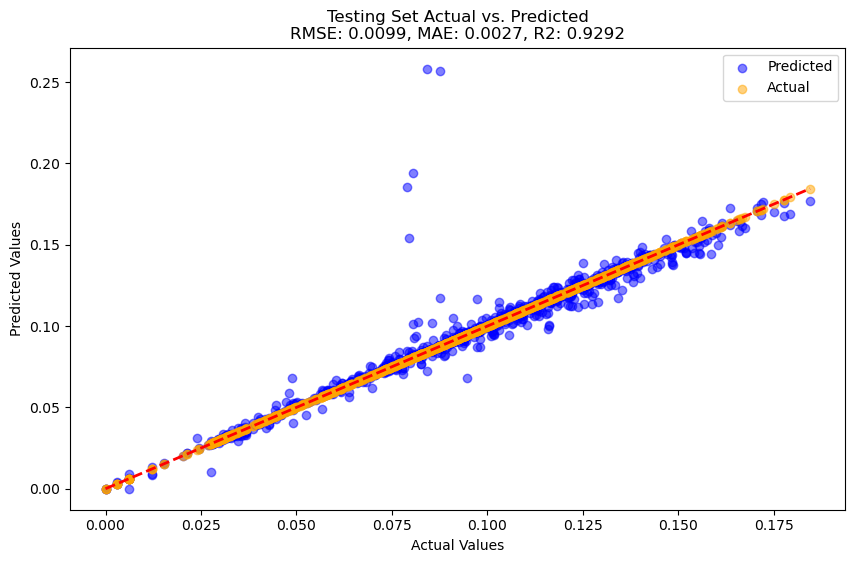

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import sqrt

# Define the file path to the Excel file
file_path = "C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/pressure_splits_80_20.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the Extra Trees model
et_model = ExtraTreesRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(et_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time

# Best model after GridSearch
best_et_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Fit the best model on the training set
best_et_model.fit(X_train, y_train.values.ravel())

# Make predictions on the datasets
y_train_pred = best_et_model.predict(X_train)
y_test_pred = best_et_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (101, 26)
y_train shape: (101, 1)
X_test shape: (44, 26)
y_test shape: (44, 1)
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best hyperparameters found:  {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training RMSE: 0.0321, MAE: 0.0112, R2: 0.9633
Testing RMSE: 0.1026, MAE: 0.0251, R2: 0.6670


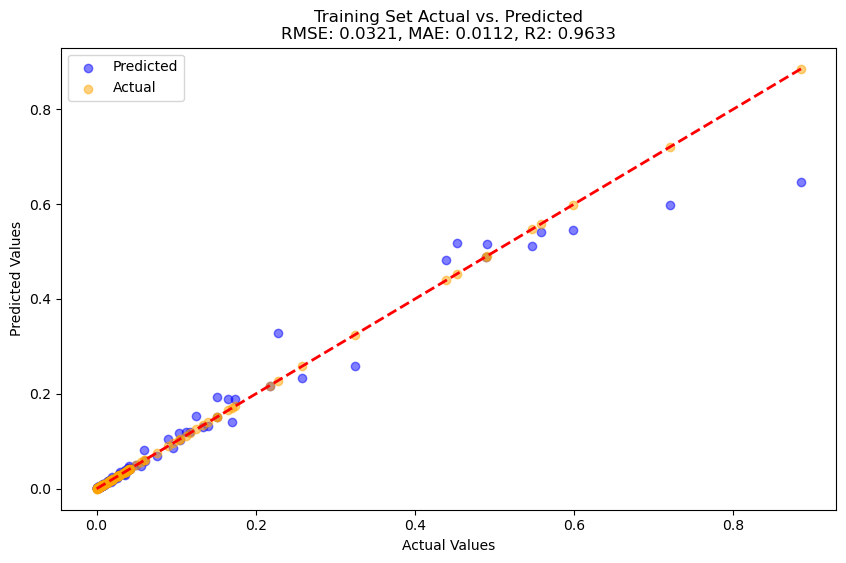

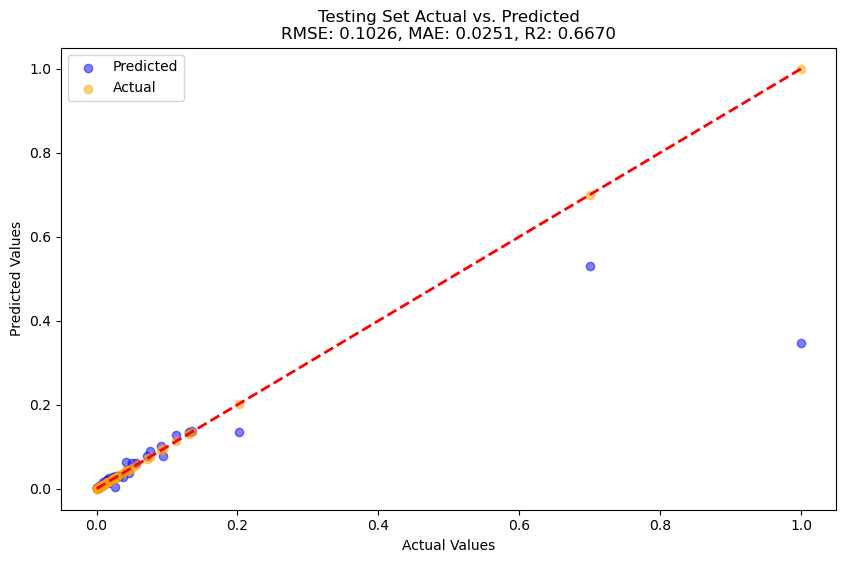

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import sqrt

# Define the file path to the Excel file
file_path = "C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/capacity_splits_70_30.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the Extra Trees model
et_model = ExtraTreesRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(et_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time

# Best model after GridSearch
best_et_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Fit the best model on the training set
best_et_model.fit(X_train, y_train.values.ravel())

# Make predictions on the datasets
y_train_pred = best_et_model.predict(X_train)
y_test_pred = best_et_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (108, 26)
y_train shape: (108, 1)
X_test shape: (37, 26)
y_test shape: (37, 1)
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best hyperparameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training RMSE: 0.0292, MAE: 0.0109, R2: 0.9677
Testing RMSE: 0.1073, MAE: 0.0274, R2: 0.6909


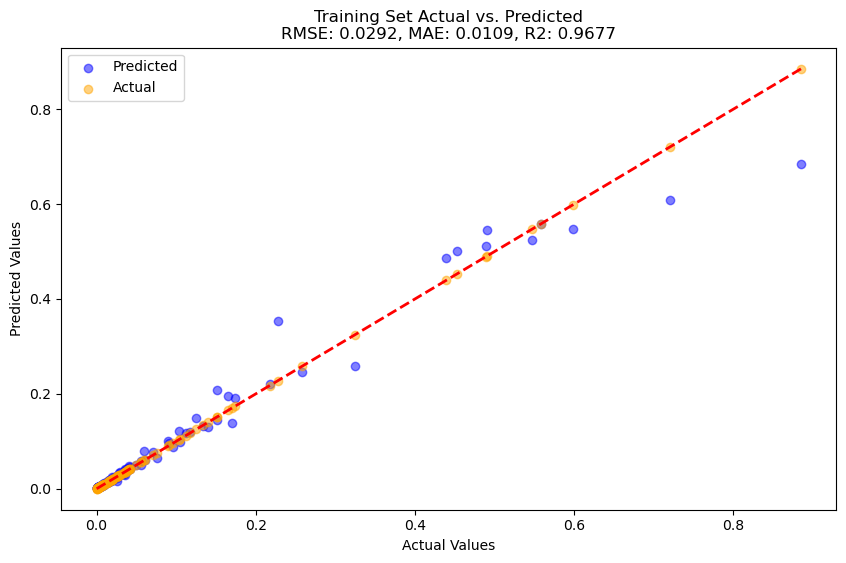

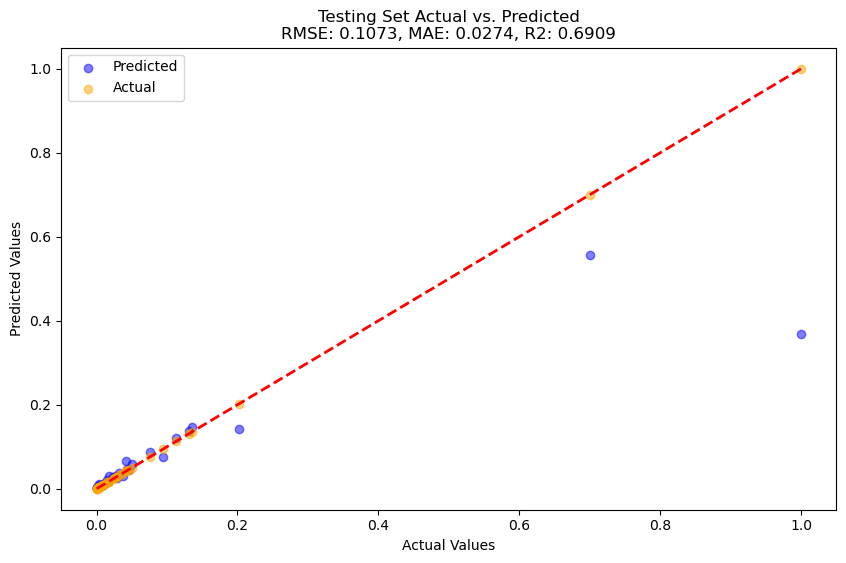

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import sqrt

# Define the file path to the Excel file
file_path = "C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/capacity_splits_75_25.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the Extra Trees model
et_model = ExtraTreesRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(et_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time

# Best model after GridSearch
best_et_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Fit the best model on the training set
best_et_model.fit(X_train, y_train.values.ravel())

# Make predictions on the datasets
y_train_pred = best_et_model.predict(X_train)
y_test_pred = best_et_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')


X_train shape: (116, 26)
y_train shape: (116, 1)
X_test shape: (29, 26)
y_test shape: (29, 1)
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best hyperparameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training RMSE: 0.0000, MAE: 0.0000, R2: 1.0000
Testing RMSE: 0.1195, MAE: 0.0329, R2: 0.6909


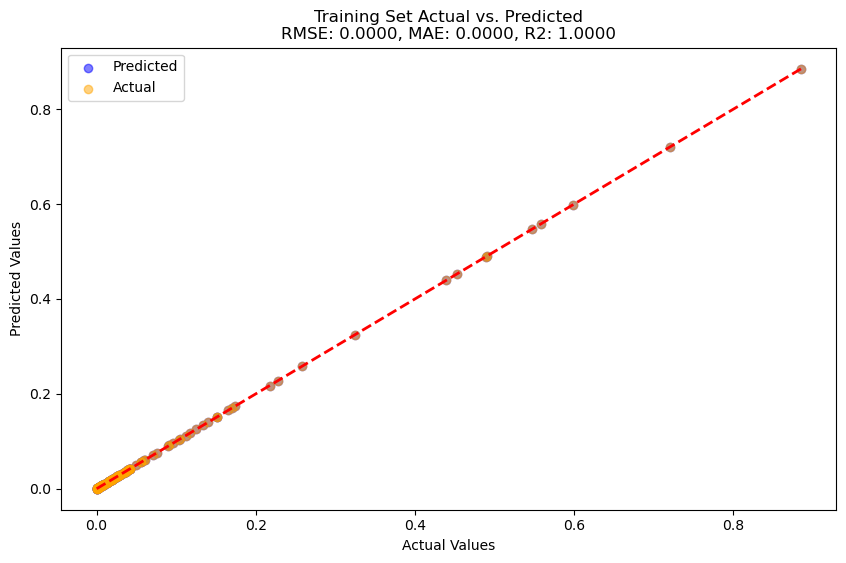

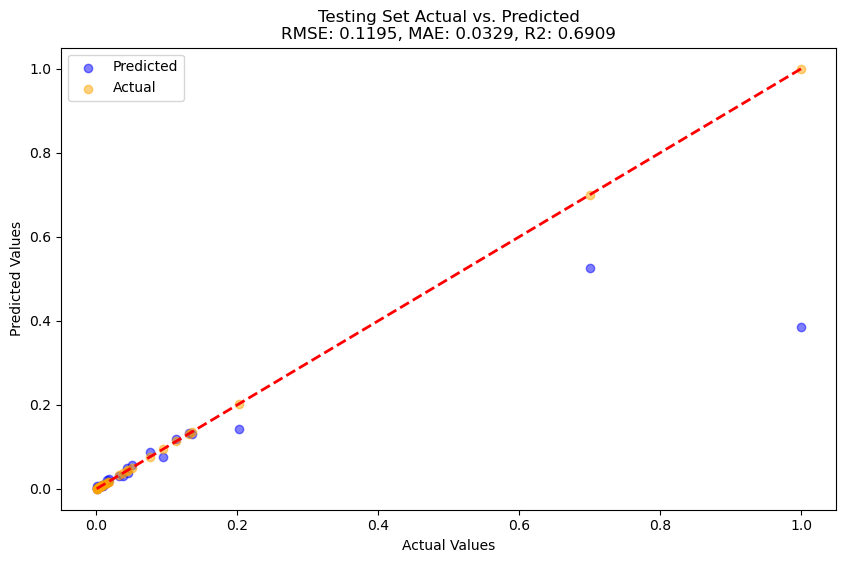

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from math import sqrt

# Define the file path to the Excel file
file_path = "C:/Users/Laura/OneDrive - HKUST (Guangzhou)/桌面/geological storage/capacity_splits_80_20.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame and assign it to a variable
X_train = pd.read_excel(xls, sheet_name='X_train')
y_train = pd.read_excel(xls, sheet_name='y_train')
X_test = pd.read_excel(xls, sheet_name='X_test')
y_test = pd.read_excel(xls, sheet_name='y_test')

# Ensure all data is float and handle missing values
def clean_data(X, y):
    combined = pd.concat([X, y], axis=1)
    combined = combined.replace([np.inf, -np.inf], np.nan)
    combined = combined.dropna()
    return combined.iloc[:, :-y.shape[1]], combined.iloc[:, -y.shape[1]:]

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

# Optionally, print the shape of each DataFrame to verify the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the Extra Trees model
et_model = ExtraTreesRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(et_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Measure training time
start_time = time.time()
grid_search.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time

# Best model after GridSearch
best_et_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Fit the best model on the training set
best_et_model.fit(X_train, y_train.values.ravel())

# Make predictions on the datasets
y_train_pred = best_et_model.predict(X_train)
y_test_pred = best_et_model.predict(X_test)

# Calculate metrics for each set
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")

# Function to plot the actual vs. predicted values with different colors
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted', color='blue')
    plt.scatter(y_true, y_true, alpha=0.5, label='Actual', color='orange')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Plot actual vs. predicted values for each set
plot_actual_vs_predicted(y_train.values, y_train_pred, f'Training Set Actual vs. Predicted\nRMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}')
plot_actual_vs_predicted(y_test.values, y_test_pred, f'Testing Set Actual vs. Predicted\nRMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}')
